# Inverse Design 5주차 - PyMEEP Tutorial

## 0. PyMEEP 개발 준비

0. PyMEEP을 설치한다.
1. ipynb 파일(또는 py 파일) 생성 후, 터미널에 `conda activate mp`를 입력하여 mp 가상환경 실행
2. `import meep`을 통해 PyMEEP 개발 준비


<U>**주의: PyMEEP에서 기본 단위는 $\mathrm{\mu m}$이다.**</U> 즉, 만약 `length = 7`이라 한다면 길이가 7 $\mathrm{\mu m}$이라는 뜻.

In [1]:
import meep as mp

# 기타 작업을 위한 라이브러리
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video

# 1. Straight Waveguide

### Problem 1

Plot $E, H$ field for $z, t$ when $l_{1} = 0.25 \times 700\ nm,\ l_{2} = 0.5 \times 700 \ nm$

(a) $l_{1} = 0.25 \times 700\ nm $

In [2]:
'''
0. (필요시) 매질 import

나중에 Waveguide의 Geometry를 설정할 때 mp.materials를 사용해서 직접 설정할 수도 있지만,
아래와 같이 미리 정의된 매질을 사용하는 것이 편리할 수도 있다.

본 프로젝트에서는 직접 설정하여 사용한다.
'''

# from meep.materials import SiO2
# from meep.materials import Si


'''
1. 계산 영역 설정

cell은 계산 영역의 크기를 설정하는 변수이다. 이 때, x축, y축, z축의 크기를 설정할 수 있다.
해당 시나리오에서는 x축과 z축만 고려하므로 y축 방향 크기는 0으로 설정한다.
'''

cell = mp.Vector3(4, 0, 2)
# 4,0,0으로 cell_2


'''
2. Waveguide 설정

전자기파가 전파되는 Waveguide의 형태를 설정한다. 해당 시나리오에서는 Waveguide가 총 3개의 Layer로 이루어져 있으므로,
각 Layer의 크기와 물성을 "이어붙여" 하나의 geometry로 설정한다.
'''

layer2_length_1 = 0.25 * 0.7 # 1(a)에서의 길이
layer2_length_2 = 0.5 * 0.7 # 1(b)에서의 길이

geometry1 = [mp.Block(mp.Vector3(2-layer2_length_1, mp.inf, mp.inf),
                     center = mp.Vector3(-layer2_length_1 - 0.5*(2-layer2_length_1), 0, 0),
                     material = mp.Medium(epsilon = 1)),
             
            mp.Block(mp.Vector3(layer2_length_1, mp.inf, mp.inf),
                     center = mp.Vector3(-0.5*layer2_length_1, 0, 0),
                     material = mp.Medium(epsilon = 2.1025)), # SiO2의 relative permittivity
            
            mp.Block(mp.Vector3(2, mp.inf, mp.inf),
                     center = mp.Vector3(1, 0, 0),
                     material = mp.Medium(epsilon = 11.8))] # Si의 relative permittivity


'''
3. Source 설정

전자기파의 Source를 설정한다. Source의 종류는 다양한데, Continuous Source, Gaussian Source, Eigenmode Source 등이 있다.
해당 시나리오에서는 단순히 파장 길이만 확인하면 되므로, Continuous Source를 사용한다.
Continuous Source로는 양쪽 방향으로 전파되는 전자기파를 설정할 수 있다.
'''

sources1 = [mp.Source(
        mp.ContinuousSource(wavelength = 0.7), # 파장 길이를 설정한다.
                            component = mp.Ez, # Electric Field의 방향을 설정한다. 해당 시나리오에서는 진행 방향인 x축과 수직인 z축 방향으로 설정한다.
                            center = mp.Vector3(-1,0,0), # Source의 중심을 설정한다.
                            size = mp.Vector3(0,0,2) # Source의 크기를 설정한다.
                            )]


'''
4. Simulation 속성 설정
Simulation 속성을 설정한다. 이 때, 어느 계산 영역에서 전자기파가 전파되는지, 어느 Source에서 전자기파가 발생하는지, 
어느 해상도로 전자기파를 계산할지 등을 설정한다.
'''

resolution = 50 # 전파되는 전자기파의 해상도를 설정한다. Resolution으로 FDTD 코드 작성 시 dz를 설정한다. 이렇게 되면 dz = 1/50이 된다.
pml_layers = [mp.PML(thickness=0.5, direction = mp.X)] # PML을 사용하여 전자기파의 반사를 최소화한다. 해당 시나리오에서는 x축 방향으로만 PML을 사용한다.

sim1 = mp.Simulation(cell_size = cell, # 계산 영역의 크기를 설정한다.
                    boundary_layers = pml_layers, 
                    geometry = geometry1, # 2번에서 설정한 geometry를 사용한다.
                    sources = sources1, # 3번에서 설정한 Source를 사용한다.
                    resolution = resolution) # 전파되는 전자기파의 해상도를 설정한다.


'''
5. Simulation 실행

Simulation을 실행한다.
'''

sim1.run(until = 50) # Simulation을 실행한다. 이 때, until은 실행되는 시간을 설정한다.

-----------
Initializing structure...
time for choose_chunkdivision = 3.71933e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.8,11.8,11.8)
time for set_epsilon = 0.076092 s
-----------


FloatProgress(value=0.0, description='0% done ', max=50.0)

run 0 finished at t = 50.0 (5000 timesteps)


     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.8,11.8,11.8)


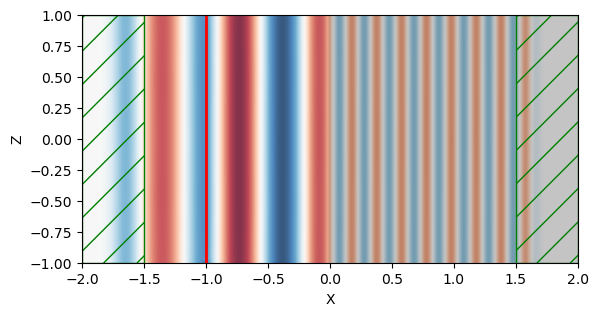

In [3]:
'''
6. 결과 확인

Simulation의 실행 결과를 확인한다. 이 때, 전자기파의 전파 방향에 따라 2D 또는 3D로 확인할 수 있다.
sim1.plot2D()를 통해 2D 결과를 확인할 수 있는데, matplotlib 함수를 같이 사용해야 이 함수를 사용할 수 있다.
'''
# %matplotlib inline
plt.figure(dpi=100)
sim1.plot2D(fields = mp.Ez) # 전자기파의 전파 방향에 따라 확인하고 싶은 Field를 설정한다. 여기에선 Electric Field의 z축 방향 성분을 확인한다.
plt.show()

# `%matplotlib inline`은 Jupyter Notebook에서만 사용 가능한 코드이다. 해당 코드를 사용하면, plt.show()를 사용하지 않아도 그림이 출력된다.

     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.8,11.8,11.8)


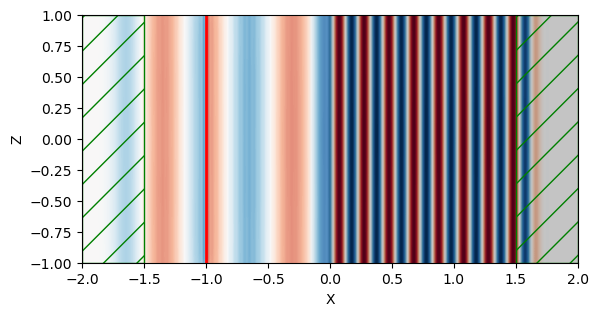

In [4]:
plt.figure(dpi=100)
sim1.plot2D(fields = mp.Hy) # 진행 방향이 x축이고 Electric Field의 z축 방향 성분을 확인했으므로, Magnetic Field의 y축 방향 성분을 확인한다.
plt.show()

### Problem 2

Plot reflected power and transmitted power when $l_{1} ~ = 0.25 * 700\ nm,\ l_{2} = 0.5 * 700 \ nm$ for wavelengths from $400\ nm \ to \ 700 \ nm$

Meep에서 Reflectance와 Transmittance는 각각 Incident Power 대비 반사되고 투과된 Power를 의미한다. 각 Power의 구체적인 수치보다 반사되고 투과된 비율을 Plot함으로써 source의 amplitude와 cell size에 무관하게 구조의 성능을 분석할 수 있다.

한 Waveguide에서 발생하는 Reflectance와 Transmittance를 확인하기 위해서는 먼저 Vacuum에서 Source에 의해 발생하는 Power를 계산하고, 그 다음 Waveguide가 있을 때 Source에 의해 발생하는 Power를 계산하여 그 비를 구해야 한다. 

     block, center = (-1.0875,0,0)
          size (4,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


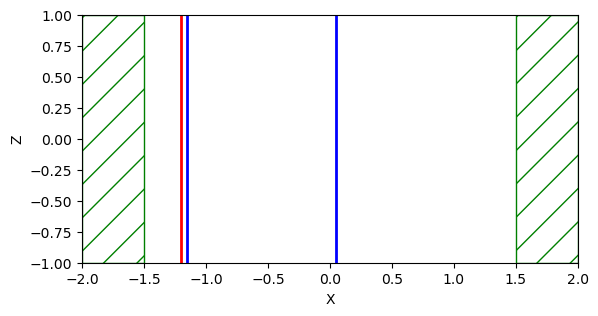

In [5]:
'''
먼저 Vacuum을 설정한다.
'''

geometry3 = [mp.Block(mp.Vector3(4, mp.inf, mp.inf),
                     center = mp.Vector3(-layer2_length_1 - 0.5*(2-layer2_length_1), 0, 0),
                     material = mp.Medium(epsilon = 1)),
            ]


'''
해당 시나리오에서는 Gaussian Source를 사용하여 전자기파를 발생시킨다. 그 이유는 특정 주파수 대역의 전자기파를 발생시키기 위함이다.
'''

wvl_min = 0.4
fmax = 1/wvl_min
wvl_max = 0.7
fmin = 1/wvl_max

sources2 = [
    mp.Source(
        mp.GaussianSource(frequency=(fmax+fmin)/2, fwidth=fmax-fmin),
        component=mp.Ez,
        center=mp.Vector3(-1.2, 0, 0),
        size=mp.Vector3(0, 0 ,2),
    )
]

sim3 = mp.Simulation(
    cell_size = cell,
    geometry = geometry3,
    sources = sources2,
    boundary_layers = pml_layers,
    resolution = resolution
)

nfreq = 301


'''
Flux Region을 설정한다. Flux Region은 전자기파의 투과와 반사를 확인하기 위한 영역이다. 이 때, 투과와 반사를 확인하고 싶은 영역을 설정한다.
add_flux 함수는 지정한 Flux Region에 대하여 포착되는 Flux들을 누산해주는 함수이다. (여기서 Flux란 Poynting Flux를 의미한다.) 쉽게 생각해서 특정 지점에서 전력을 계산해주는 함수라고 생각하면 된다.
'''

refl_fr1 = mp.FluxRegion(
    center = mp.Vector3(-1.15,0,0), size = mp.Vector3(0,0,4)
)
refl1 = sim3.add_flux((fmax+fmin)/2, fmax-fmin, nfreq, refl_fr1)

tran_fr1 = mp.FluxRegion(
    center = mp.Vector3(0.05,0,0), size = mp.Vector3(0,0,4)
)
tran1 = sim3.add_flux((fmax+fmin)/2, fmax-fmin, nfreq, tran_fr1)

plt.figure(dpi=100)
sim3.plot2D()
plt.show()

In [6]:
'''
Simulation을 실행한다. 이때, mp.stop_when_fields_decayed 함수를 사용하여 전자기파의 감쇠를 설정할 수 있다.
이 지점은 pt라는 변수로 설정한다.
'''

pt = mp.Vector3(0.5,0,0)

sim3.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3)) # Source가 발생한 후 50초"마다", pt 지점에서의 전자기파의 진폭이 1e-3보다 작아지면 Simulation이 종료된다.

refl1_data = sim3.get_flux_data(refl1) # Reflection의 데이터를 저장하는 변수이다.
tran1_flux = mp.get_fluxes(refl1) # Transmission의 flux를 저장하는 변수이다.

-----------
Initializing structure...
time for choose_chunkdivision = 2.7895e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (-1.0875,0,0)
          size (4,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.059298 s
-----------
field decay(t = 50.01): 0.25590621788980916 / 0.25590621788980916 = 1.0
field decay(t = 100.01): 3.802233119617466e-11 / 0.25590621788980916 = 1.4857916118531642e-10
run 0 finished at t = 100.01 (10001 timesteps)


-----------
Initializing structure...
time for choose_chunkdivision = 2.88486e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.8,11.8,11.8)
time for set_epsilon = 0.0734899 s
-----------
field decay(t = 50.01): 0.06048638600932631 / 0.06048638600932631 = 1.0
on time step 9732 (time=97.32), 0.000411046 s/step
field decay(t = 100.01): 2.5809043466218192e-11 / 0.06048638600932631 = 4.266917759351457e-10
run 0 finished at t = 100.01 (10001 timesteps)


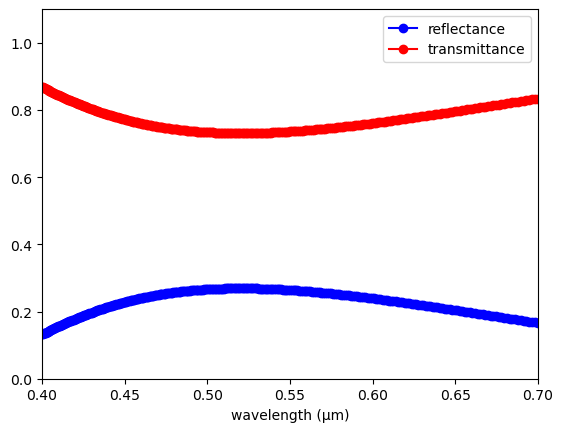

In [7]:
sim3.reset_meep() # Waveguide를 도입하기 위해 이전의 Simulation을 초기화한다.


'''
문제 상황의 Geometry를 설정한다.
'''
geometry3 = [mp.Block(mp.Vector3(2-layer2_length_1, mp.inf, mp.inf),
                     center = mp.Vector3(-layer2_length_1 - 0.5*(2-layer2_length_1), 0, 0),
                     material = mp.Medium(epsilon = 1)),
            mp.Block(mp.Vector3(layer2_length_1, mp.inf, mp.inf),
                     center = mp.Vector3(-0.5*layer2_length_1, 0, 0),
                     material = mp.Medium(epsilon = 2.1025)),
            mp.Block(mp.Vector3(2, mp.inf, mp.inf),
                     center = mp.Vector3(1, 0, 0),
                     material = mp.Medium(epsilon = 11.8))]

sim3 = mp.Simulation(
    cell_size = cell,
    geometry = geometry3,
    sources = sources2,
    boundary_layers = pml_layers,
    resolution = resolution
)

'''
한 Waveguide에서 발생하는 Reflectance를 확인하기 위해서는, 초기 Simulation에서 얻은 Flux 데이터의 부호를 반전시켜 다음 Simulation 결과와 합쳐야 한다.
Meep에서 모든 플럭스는 기본적으로 양의 좌표 방향으로 계산되기 때문에, 반사된 플럭스를 음의 방향으로 변환해야 합니다.
'''
refl1 = sim3.add_flux((fmax+fmin)/2, fmax-fmin, nfreq, refl_fr1)
tran1 = sim3.add_flux((fmax+fmin)/2, fmax-fmin, nfreq, tran_fr1)
sim3.load_minus_flux_data(refl1, refl1_data)


sim3.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

final_refl_flux = mp.get_fluxes(refl1)
final_tran_flux = mp.get_fluxes(tran1)


flux_freqs = mp.get_flux_freqs(refl1)

wl = []
Rs = []
Ts = []

for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-final_refl_flux[i]/tran1_flux[i]) # 반사된 플럭스를 음의 방향으로 변환하여 구한다.
    Ts = np.append(Ts,final_tran_flux[i]/tran1_flux[i])


plt.figure()
plt.plot(wl,Rs,'bo-',label='reflectance')
plt.plot(wl,Ts,'ro-',label='transmittance')
plt.axis([0.4, 0.7, 0, 1.1])
plt.xlabel("wavelength (μm)")
plt.legend(loc="upper right")
plt.show()

### Problem 3

Derive and plot reflected power and transmitted power when $l_{1} ~ = 0.25 \times 700\ nm,\ l_{2} = 0.5 \times 700 \ nm$ for $ 700\ nm $ wavelength and incidence angle from -89 ~ 89 degrees

-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
time for set_epsilon = 0.0293598 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.42886,0,0) = 1.42886 after 18 iters
on time step 4007 (time=40.07), 0.000998435 s/step
field decay(t = 50.01): 0.00012993715630998018 / 0.00012993715630998018 = 1.0
on time step 8172 (time=81.72), 0.000960491 s/step
field decay(t = 100.01): 0.4702406659396328 / 0.4702406659396328 = 1.0
on time step 12403 (time=124.03), 0.000945467 s/step
field decay(t = 150.02): 1.2444822003358293 / 1.2444822003358293 = 1.0
on time step 16765 (time=167.65), 0.000917145 s/step
field decay(t = 200.03): 0.4084567195924576 / 1.2444822003358293 = 0.3282141917997973
on time step 21134 (time=211.34), 0.000915701 s/step
field decay(t = 250.04): 8.494894205982974e-05 / 1.2444822003358293 = 6.8260471734273e-05
run 0 finished at t = 250.04 (25004 tim

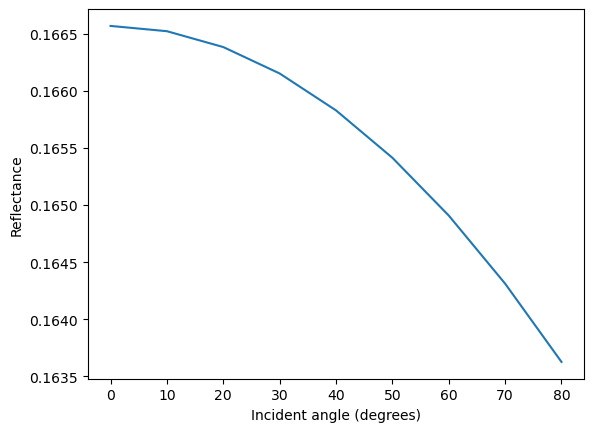

In [11]:
geometry5 = [mp.Block(mp.Vector3(2-layer2_length_1, mp.inf, mp.inf),
                     center = mp.Vector3(-layer2_length_1 - 0.5*(2-layer2_length_1), 0, 0),
                     material = mp.Medium(epsilon = 1)),
            mp.Block(mp.Vector3(layer2_length_1, mp.inf, mp.inf),
                     center = mp.Vector3(-0.5*layer2_length_1, 0, 0),
                     material = mp.Medium(epsilon = 2.1025)),
            mp.Block(mp.Vector3(2, mp.inf, mp.inf),
                     center = mp.Vector3(1, 0, 0),
                     material = mp.Medium(epsilon = 11.8))]

cell_2 = mp.Vector3(4,0,2)

pt = mp.Vector3(0.5,0,0)

reflectance = []

fmax=1/0.69
fmin=1/0.71
fcen=(fmax+fmin)/2
df=fmax-fmin
nfreq = 1

sources3 = [
    mp.Source(
        mp.GaussianSource(frequency=(fmax+fmin)/2, fwidth=fmax-fmin),
        component=mp.Ez,
        center=mp.Vector3(-1.2, 0, 0),
        # size=mp.Vector3(0, 0 ,2),
    )
]

import math

theta=np.arange(0,90,10)

# rotation angle (in degrees) of source: CCW around Y axis, 0 degrees along +Z axis

for radian in range(theta.size):
    rot_angle = np.radians(radian)

    # plane of incidence is xz
    k_point = mp.Vector3(fcen).rotate(mp.Vector3(y=1), rot_angle)
    
    sources3 = [
        mp.EigenModeSource(
        src=mp.GaussianSource(frequency=(fmax+fmin)/2, fwidth=fmax-fmin),
        center=mp.Vector3(-1.2, 0, 0),
        size=mp.Vector3(z=2),
        direction=mp.AUTOMATIC,
        eig_kpoint=k_point,
        eig_band=1,
        eig_match_freq=True,
    )
    ]

    sim5 = mp.Simulation(cell_size=cell_2,
                         boundary_layers=pml_layers,
                         sources=sources3,
                         k_point=k_point,
                         resolution=resolution)

    refl_fr3 = mp.FluxRegion(center = mp.Vector3(-1.15,0,0), size = mp.Vector3(0,0,4))
    refl3 = sim5.add_flux((fmax+fmin)/2, fmax-fmin, nfreq, refl_fr3)

    # field_component = mp.Ez if dimensions == 3 else mp.Ex
    sim5.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
    

    empty_flux = mp.get_fluxes(refl3)
    empty_data = sim5.get_flux_data(refl3)
    
    sim5.reset_meep()

    sim5 = mp.Simulation(cell_size=cell_2,
                         geometry=geometry5,
                         boundary_layers=pml_layers,
                         sources=sources3,
                         k_point=k_point,
                         resolution=resolution)

    refl3 = sim5.add_flux(fcen, df, nfreq, refl_fr3)
    sim5.load_minus_flux_data(refl3, empty_data)

    # field_component = mp.Ez if dimensions == 3 else mp.Ex
    sim5.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

    refl_flux = mp.get_fluxes(refl3)
    freqs = mp.get_flux_freqs(refl3)
    
    reflectance.append(-refl_flux[0]/empty_flux[0])
    print(reflectance)

plt.figure()
plt.plot(theta, reflectance)
plt.xlabel('Incident angle (degrees)')
plt.ylabel('Reflectance')
plt.show()